In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Zoo (1).csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## visualization

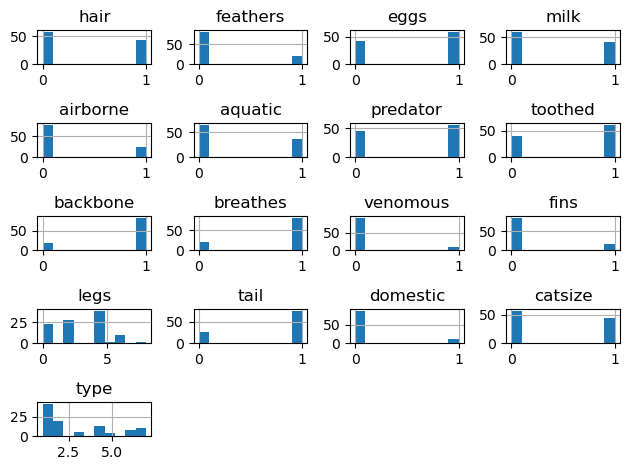

In [5]:
df.hist()
plt.tight_layout()


In [6]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [7]:
df['hair'].nunique()

2

In [8]:
df['feathers'].nunique()

2

In [9]:
df['eggs'].nunique()

2

In [10]:
df['milk'].nunique()

2

In [11]:
df['airborne'].nunique()

2

In [12]:
df['aquatic'].nunique()

2

In [13]:
df['predator'].nunique()

2

In [14]:
df['toothed'].nunique()

2

In [15]:
df['type'].nunique()

7

In [16]:
df['tail'].nunique()

2

In [17]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [18]:
df['domestic'].nunique()

2

## Spliting the Data

In [19]:
x = df.iloc[:,1:]
y = df['type']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)



In [23]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [24]:
ypred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 7, 4, 2],
      dtype=int64)

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



In [26]:
print(accuracy_score(ytest,ypred))

0.9523809523809523


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred_1 = knn.predict(xtest)

In [28]:
confusion_matrix(ytest,ypred_1)

array([[11,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [29]:
print(classification_report(ytest,ypred_1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [30]:
ypred_1

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2],
      dtype=int64)

In [31]:
num_folds = 10
kfold = KFold(n_splits=10)

In [32]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x, y, cv=kfold)

In [33]:
print(results.mean())


0.8099999999999999


In [34]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [36]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [37]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 1}


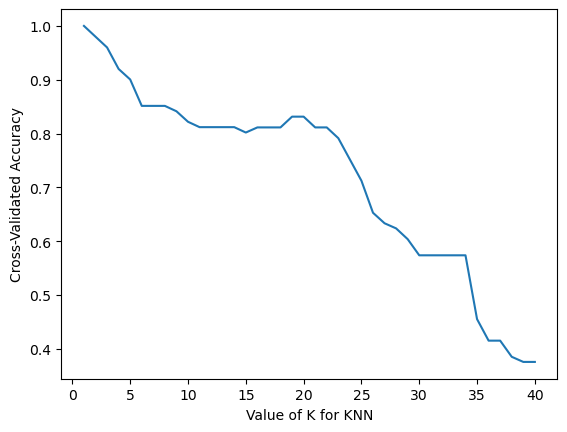

In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [39]:
ypred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 7, 4, 2],
      dtype=int64)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
y_pred = lg.predict(xtest)

In [42]:
xtest 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5


In [43]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [44]:
y_pred = pd.DataFrame(y_pred)

In [46]:
y_pred

,0
0,1
1,2
2,1
3,2
4,1
5,7
6,1
7,2
8,4
9,5
